In [2]:
import pandas as pd
import numpy as np

In [3]:
def initialize(n_states):
    transmat = np.ones((n_states,n_states))/float(n_states)
    for i in range(n_states):
        transmat[i,:] += sp.random.uniform(-1./n_states,1./n_states,n_states)
        transmat[i,:] /= sum(transmat[i,:])
    startprob = np.ones(n_states)/float(n_states) + sp.random.uniform(-1./n_states,1./n_states,n_states)
    startprob /= sum(startprob)
    return startprob, transmat

def predict(mfcc_array, models):
    M = -np.inf
    ind = 0
    for i,model in enumerate(models):
        if model.score(mfcc_array) > M:
            ind = i
            M = val
    return ind

# Load Data

In [4]:
test = pd.read_csv("Test_Arabic_Digit.txt", header=None, sep=' ')
test = np.split(test, test[test.isnull().all(1)].index)
test = [df[1:].reset_index().drop('index', axis=1).values for df in test[1:]]
truncated_test = np.array([arr[:4] for arr in test])

train = pd.read_csv("Train_Arabic_Digit.txt", header=None, sep=' ')
train = np.split(train, train[train.isnull().all(1)].index)
train = [df[1:].reset_index().drop('index', axis=1).values for df in train[1:]]
truncated_train = np.array([arr[:4] for arr in train])

test_target_number = [i for i in range(10) for _ in range(220)]
test_target_gender = [gender for _ in range(10) for gender in ['m', 'f'] for _ in range(110)]

train_target_number = np.array([i for i in range(10) for _ in range(660)])
train_target_gender = np.array([gender for _ in range(10) for gender in ['m', 'f'] for _ in range(330)])

longest_time_series = max(list(map(len, train)))
longest_time_series

93

In [5]:
# pad data so each row is the same length
# longest_time_series = max(list(map(len, train)))

_, d = test[0].shape
padded_test = np.array([np.concatenate((array, np.zeros((longest_time_series-array.shape[0], d)))) for array in test])

padded_train = np.array([np.concatenate((array, np.zeros((longest_time_series-array.shape[0], d)))) for array in train])


In [ ]:
# If train() takes data as single argument instead of 2
# train_number = np.hstack((train_data, train_target_number.reshape(-1,1)))
# train_gender = np.hstack((train_data, train_target_gender.reshape(-1,1)))

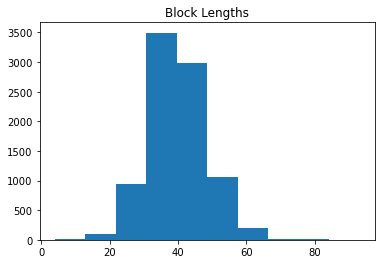

In [128]:
plt.hist([len(df) for df in test+train])
plt.title("Block Lengths")
plt.show()

# K Neighbors Time Series Classifier

In [8]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.datasets import load_unit_test
# test the thing so it 
# X_train, y_train = load_unit_test(return_X_y=True, split="train")
# X_test, y_test = load_unit_test(return_X_y=True, split="test")
# classifier = KNeighborsTimeSeriesClassifier()
# classifier.fit(X_train, y_train)

# classifier.score(X_test, y_test)

In [10]:
# train = np.array([arr[:4] for arr in train])


classifier1 = KNeighborsTimeSeriesClassifier()
classifier1.fit(truncated_train, train_target_number)

classifier1.score(truncated_test, test_target_number)

0.6336363636363637

In [ ]:
# train = np.array([arr[:4] for arr in train])


classifier2 = KNeighborsTimeSeriesClassifier()
classifier2.fit(padded_train, train_target_number)

classifier2.score(padded_test, test_target_number)

In [ ]:
# train = np.array([arr[:4] for arr in train])


classifier3 = KNeighborsTimeSeriesClassifier()
classifier3.fit(truncated_train, train_target_gender)

classifier3.score(truncated_test, test_target_gender)

In [ ]:
# train = np.array([arr[:4] for arr in train])


classifier4 = KNeighborsTimeSeriesClassifier()
classifier4.fit(padded_train, train_target_gender)

classifier4.score(padded_test, test_target_gender)